In [1]:
import re
import json
import unicodedata
import nltk

from nltk.stem.snowball import SnowballStemmer

In [2]:
def json_cleaner(data, words):
    tuple = data["text"]

    no_corchete = re.sub(r'\[(.*?)\]', ' ', tuple)
    no_css = unicodedata.normalize("NFKD", no_corchete)
    no_unicode = re.sub(r'\\u(.){4}', ' ', no_css)
    no_newline = no_unicode.replace('\n', ' ')
    no_punctuation = re.sub(r'[,:.()]', ' ', no_newline)
    no_alphanumeric = re.sub(r'[^a-zA-Z0-9-\W]', ' ', no_punctuation)
    lower_case = no_alphanumeric.lower()

    split = re.split('\W+', lower_case)
    words.extend(split)
    return

In [3]:
def vocab_fix(words_list, vocab, snow_stemmer):

    for w in words_list:
        word = snow_stemmer.stem(w)
        if word not in vocab:
            vocab[word] = 1
        else:
            vocab[word] += 1

    return

In [4]:
def iteration_vocab(list_limit, snow_stemmer, sts_word, sts_vocab):
    #Por cada una de los limites que se hayan solicitado
    for i in list_limit:
        print("limite: ", i)
        # Crear la lista de palabras completas
        words = []
        # Crear el diccionario de vocabulario
        vocab = {}

        index = 0
        # Se llenara la lista de words acorde al limite seleccionado
        while len(words) < i:
            json_cleaner(data[index], words)
            if len(words) > i:
                words = words[:i]

            index += 1

        vocab_fix(words, vocab, snow_stemmer)


        sts_word.append(len(words))
        sts_vocab.append(len(vocab))

In [5]:
with open('articles.json') as f:
   data = json.load(f)

# Cuantificar palabras tokenizadas
sts_word = []
# cuantificar palabras vocabulario
sts_vocab = []
# Cuantificar porcentajes
sts = []


#Setear el inicio
snow_stemmer = SnowballStemmer(language='spanish')
list_limit = [100, 300, 1000, 4500, 10000, 69696, 100000, 143590, 853641, 1000000]


iteration_vocab(list_limit, snow_stemmer, sts_word, sts_vocab)


for i in range(len(sts_word)):
    sts.append(sts_vocab[i]/sts_word[i])

print('')
print(sts_word)
print(sts_vocab)
# print(sts)

limite:  100
limite:  300
limite:  1000
limite:  4500
limite:  10000
limite:  69696
limite:  100000
limite:  143590
limite:  853641
limite:  1000000
[100, 300, 1000, 4500, 10000, 69696, 100000, 143590, 853641, 1000000]
[62, 168, 395, 1281, 2406, 8829, 11242, 13466, 30529, 32987]
[0.62, 0.56, 0.395, 0.2846666666666667, 0.2406, 0.12667871900826447, 0.11242, 0.0937809039626715, 0.03576327753704426, 0.032987]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

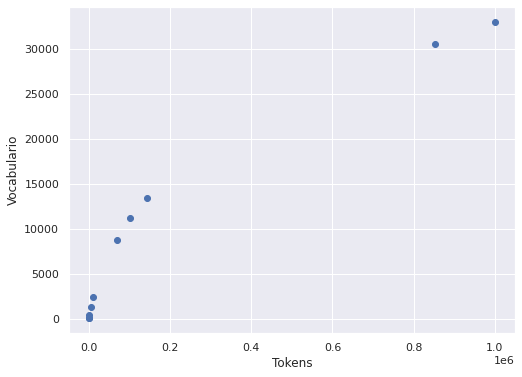

<Figure size 432x288 with 0 Axes>

In [14]:
_ = plt.figure(figsize=(8, 6))

_ = plt.scatter(sts_word, sts_vocab)
_ = plt.xlabel("Tokens")
_ = plt.ylabel("Vocabulario")

plt.show()
plt.clf()